In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# 주가 데이터 로드
# df = pd.read_csv('주가데이터.csv')  # 실제 주가 데이터 파일명으로 수정
import FinanceDataReader as fdr

#삼성전자(005930) 전체 (1996-11-05 ~ 현재)
df = fdr.DataReader('005930')

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
# '년', '월', '일' 필드를 'date' 필드로 변경
df['date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [ ]:
df.info()

In [ ]:
df.tail()

In [ ]:
# 주가 데이터 전처리
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [ ]:
# 시계열 데이터 생성
lookback = 30  # 이전 30일 데이터를 사용하여 예측
X = []
y = []
print(len(scaled_data) - lookback - 7)
for i in range(len(scaled_data) - lookback - 7):  # 현재부터 7일 전까지 데이터 사용
    X.append(scaled_data[i:i + lookback])
    y.append(scaled_data[i + lookback + 7])  # 현재부터 7일 후의 주가를 예측

X = np.array(X)
y = np.array(y)

In [ ]:
# 데이터셋 분할 (학습:검증 = 8:2)
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(lookback, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


In [ ]:
X.shape

In [ ]:
df['date'].values[-lookback:]

In [ ]:
df['Close'].values[-lookback:]

In [ ]:
df['date'].values[-lookback-1:-lookback+6]

In [ ]:
df.tail()

In [ ]:
# 마지막 날짜 값 추출
last_date = df['date'].iloc[-1]

# 7번 반복하여 하루씩 행 추가
for _ in range(7):
    next_date = last_date + pd.DateOffset(days=1)    
    df = df.append({'date': next_date}, ignore_index=True)
    last_date = next_date


In [ ]:
df.tail(10)

In [ ]:
df['date'].tail(7)

In [ ]:
# 예측 결과 시각화
plt.plot(df['date'].values[-lookback:], df['Close'].values[-lookback:], label='Actual')
plt.plot(df['date'].tail(7), prediction, label='Predicted')
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('7-day Stock Price Prediction')
plt.legend()
plt.show()

In [ ]:
#W=======================================

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation

In [2]:
import FinanceDataReader as fdr

#삼성전자(005930) 전체 (1996-11-05 ~ 현재)
data = fdr.DataReader('005930')

In [3]:
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
# '년', '월', '일' 필드를 'date' 필드로 변경
data['date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

In [4]:
# 데이터 로드 및 전처리
# data = df  # 주가 데이터 파일명에 맞게 수정
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

In [ ]:
data.tail()

In [5]:
# 학습 데이터 생성
look_back = 60  # 과거 데이터를 참조하는 기간 (조정 가능)
X = []
y = []
for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i + look_back, 0])
    y.append(scaled_data[i + look_back, 0])
X = np.array(X)
y = np.array(y)

In [6]:
# 학습 데이터 및 테스트 데이터 분할
train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용 (조정 가능)
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# LSTM 모델 생성 및 학습
# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
# model.add(LSTM(50))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(X_train, y_train, epochs=100, batch_size=32)

In [52]:
X_test.shape

(1188, 60)

In [7]:
#2단계: 모델 생성
model = Sequential()

model.add(LSTM( units=50,
    input_dim=1,
    
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.0050868988037109375


In [20]:
#3단계: 모델 학습
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=100,
    validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 2s 203ms/step - loss: 0.0014 - val_loss: 0.0024
Epoch 2/100
9/9 [==============================] - 2s 203ms/step - loss: 9.7486e-04 - val_loss: 0.0051
Epoch 3/100
9/9 [==============================] - 2s 207ms/step - loss: 9.3479e-04 - val_loss: 6.7246e-04
Epoch 4/100
9/9 [==============================] - 2s 206ms/step - loss: 8.6372e-04 - val_loss: 0.0048
Epoch 5/100
9/9 [==============================] - 2s 210ms/step - loss: 7.0958e-04 - val_loss: 0.0012
Epoch 6/100
9/9 [==============================] - 2s 213ms/step - loss: 7.0445e-04 - val_loss: 0.0037
Epoch 7/100
9/9 [==============================] - 2s 206ms/step - loss: 7.8221e-04 - val_loss: 0.0022
Epoch 8/100
9/9 [==============================] - 2s 204ms/step - loss: 5.8004e-04 - val_loss: 0.0024
Epoch 9/100
9/9 [==============================] - 2s 202ms/step - loss: 7.1339e-04 - val_loss: 0.0010
Epoch 10/100
9/9 [==============================] - 2s 205ms/step - loss:

In [54]:
X_test.shape

(1188, 60)

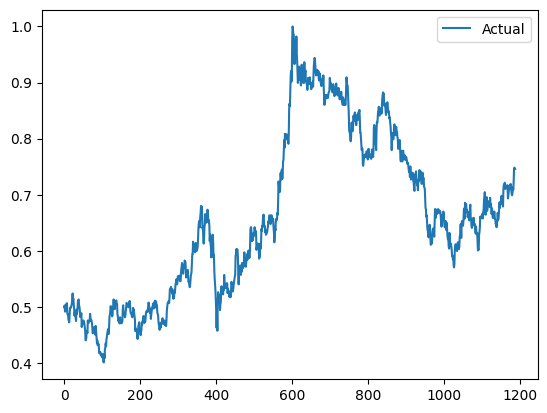

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# LSTM 모델 예측 함수
def predict_sequences_multiple(model, X_test, length, interval):
    predictions = []
    for i in range(0, len(X_test) - length + 1, interval):
        curr_sequence = X_test[i:i+length]
        curr_sequence = curr_sequence.reshape(1, length, 1)  # 형태 변환
        prediction = model.predict(curr_sequence)
        predictions.append(prediction[0])
    return predictions

# LSTM 모델 결과 시각화 함수
def plot_results_multiple(predictions, y_test, length):
    plt.plot(y_test, label='Actual')
    for i, data in enumerate(predictions):
        padding = [None for _ in range(i * interval)]
        plt.plot(padding + data, label='Prediction')
    plt.legend()
    plt.show()

# 예측을 위한 LSTM 모델과 테스트 데이터 준비
# model = # LSTM 모델 정의 및 학습이 완료된 모델을 할당

# 예측 수행
length = 50  # 예측 결과의 길이
interval = 50  # 예측할 시퀀스의 간격
X_test = X_test.reshape(1, -1, 1)  # 데이터 형태 변환
predictions = predict_sequences_multiple(model, X_test, length, interval)

# 결과 시각화
plot_results_multiple(predictions, y_test, length)


In [12]:
last_60_days = scaled_data[-look_back:]
last_60_days.shape

(60, 1)

In [22]:
predicted_list = []

In [23]:
for i in range(7):
    X_pred = np.array([last_60_days])
    X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))
    # 7일간의 주가 예측
    predicted_prices = model.predict(X_pred)
    last_60_days = np.append(last_60_days, predicted_prices)
    predicted_prices = scaler.inverse_transform(predicted_prices)
    predicted_list.append(predicted_prices.item())
    last_60_days = last_60_days[1:]

1/1 [==============================] - 0s 21ms/step


In [24]:
last_60_days

array([0.65550025, 0.65661876, 0.6655668 , 0.67898887, 0.68681841,
       0.67675186, 0.6856999 , 0.68346289, 0.68905542, 0.69800347,
       0.68793692, 0.69352944, 0.69688496, 0.67898887, 0.70918852,
       0.71701806, 0.71925508, 0.72037358, 0.72149209, 0.71030703,
       0.71254404, 0.71589956, 0.71478105, 0.71254404, 0.71701806,
       0.71142554, 0.69352944, 0.69912197, 0.7047145 , 0.71478105,
       0.71701806, 0.71366255, 0.71030703, 0.71925508, 0.71254404,
       0.7047145 , 0.70024048, 0.69912197, 0.703596  , 0.71366255,
       0.70918852, 0.72261059, 0.74721772, 0.74833622, 0.74721772,
       0.74609921, 0.51321208, 0.51180971, 0.50819534, 0.50266993,
       0.49562004, 0.48742822, 0.4784362 , 0.57150966, 0.55615646,
       0.54508841, 0.53699809, 0.53094506, 0.52626455, 0.52249438])

In [25]:
display(predicted_list)
# predicted_7 = np.array(predicted_list)
# display(predicted_7)

[52690.8203125,
 51318.16796875,
 50328.62890625,
 49605.3125,
 49064.140625,
 48645.6796875,
 48308.609375]

In [26]:
# 마지막 날짜 값 추출
last_date = data['date'].iloc[-1]

for i in range(7):
    next_date = last_date + pd.DateOffset(days=1)
    new_row = {'date': next_date, 'Close': predicted_list[i]}
    data = data.append(new_row, ignore_index=True)
    last_date = next_date


C:\Users\Use 1\AppData\Local\Temp\ipykernel_14392\2207845087.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\Use 1\AppData\Local\Temp\ipykernel_14392\2207845087.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\Use 1\AppData\Local\Temp\ipykernel_14392\2207845087.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\Users\Use 1\AppData\Local\Temp\ipykernel_14392\2207845087.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(new_row, ignore_index=True)
C:\U

In [27]:
data.tail(10)

,Open,High,Low,Close,Volume,Change,Year,Month,Day,date
6004,NaN,NaN,NaN,45905.910156,NaN,NaN,NaN,NaN,NaN,2023-05-29
6005,NaN,NaN,NaN,45173.519531,NaN,NaN,NaN,NaN,NaN,2023-05-30
6006,NaN,NaN,NaN,44369.589844,NaN,NaN,NaN,NaN,NaN,2023-05-31
6007,NaN,NaN,NaN,52690.820312,NaN,NaN,NaN,NaN,NaN,2023-06-01
6008,NaN,NaN,NaN,51318.167969,NaN,NaN,NaN,NaN,NaN,2023-06-02
6009,NaN,NaN,NaN,50328.628906,NaN,NaN,NaN,NaN,NaN,2023-06-03
6010,NaN,NaN,NaN,49605.312500,NaN,NaN,NaN,NaN,NaN,2023-06-04
6011,NaN,NaN,NaN,49064.140625,NaN,NaN,NaN,NaN,NaN,2023-06-05
6012,NaN,NaN,NaN,48645.679688,NaN,NaN,NaN,NaN,NaN,2023-06-06
6013,NaN,NaN,NaN,48308.609375,NaN,NaN,NaN,NaN,NaN,2023-06-07


In [28]:
lookback = 60

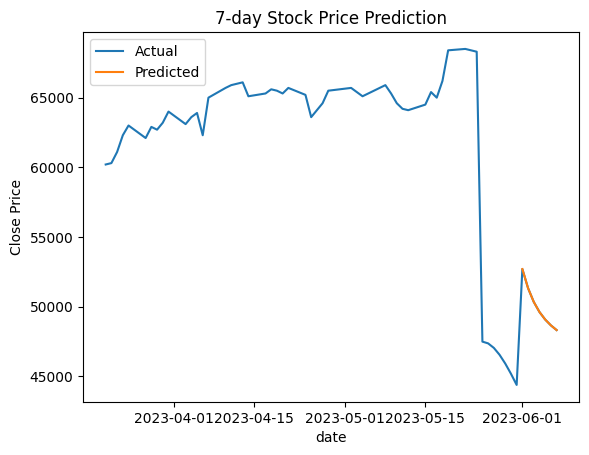

In [29]:
# 예측 결과 시각화
plt.plot(data['date'].values[-lookback:], data['Close'].values[-lookback:], label='Actual')
plt.plot(data['date'].tail(7), data['Close'].tail(7), label='Predicted')
plt.xlabel('date')
plt.ylabel('Close Price')
plt.title('7-day Stock Price Prediction')
plt.legend()
plt.show()